# FIT5196 Assessment 2 (Data cleaning)
#### Student Name: Mayank Bhardwaj
#### Student ID: 29325293

Date:3/10/2018

Environment: Python 3.6.4 and Jupyter notebook
Libraries used: 
* pandas
* numpy
* datetime
* monthrange
* matplotlib.pyplot
* kmeans 
* conter
* math functions
* from mpl_toolkits.mplot3d import Axes3D
* import statsmodels.formula.api as smf

## 1. Introduction
* In this assessment, we have analyze the data from our dataset, find and fix the problems in the data.
* The input and output of this task are shown below:
    * Table 1. The input as 29325293.csv and output of the task 29325293_solution.csv
* We have perform both graphical and non-graphical EDA methods to understand the data first and then find the data problems.     


## 2.  Import libraries.

In [1]:
import pandas as pd
import numpy as np
import datetime
from calendar import monthrange
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from collections import Counter
from math import sin, cos, sqrt, atan2, radians

In [2]:
# Data has been loaded in the df1 dataframe.
df1 = pd.read_csv('29325293.csv')

In [3]:
# We have check how many null values we have in every field.
df1.isnull().sum()

Id                       24
Drone Type               10
Post Type                20
Package Weight            0
Origin Region            10
Destination Region       10
Origin Latitude           0
Origin Longitude          0
Destination Latitude      0
Destination Longitude     0
Journey Distance          0
Departure Date            0
Departure Time            0
Travel Time              40
Delivery Time             0
Delivery Fare            29
dtype: int64

In [4]:
# Now we have checked the type of column.
for columns in df1:
    print (type(df1[columns][1]))
df1.columns    

<class 'str'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'str'>
<class 'str'>
<class 'numpy.float64'>
<class 'str'>
<class 'numpy.float64'>


Index(['Id', 'Drone Type', 'Post Type', 'Package Weight', 'Origin Region',
       'Destination Region', 'Origin Latitude', 'Origin Longitude',
       'Destination Latitude', 'Destination Longitude', 'Journey Distance',
       'Departure Date', 'Departure Time', 'Travel Time', 'Delivery Time',
       'Delivery Fare'],
      dtype='object')

## 3. Date time format correction.(Departure date)
* By running the datetime we have checked we have some dates are not in correct format.
After that we have checked the some month are not between 1 and 12, so we have swap the date and month and save it in the departure date columns. After this we have checked that month like february has date as 30, which is not correct. Se we have updated the last date of the month in this scenario.


In [5]:
for each in df1.index:
    inputdate = df1.iloc[each]["Departure Date"] # inputdate variable contains the departure date

    year,month,day = inputdate.split('-') # split it on basis of '-'
    valid_date = True
    
    try :
        datetime.datetime(int(year),int(month),int(day)) # by using datetime function we are checking date.
    except ValueError :
        valid_date = False
    if(valid_date) == False :
        
        if 1 <= int(month) <= 12 : # check if month i 1 and 2
            dayvar = day
            a = monthrange(int(year), int(month))
            rand,day = a 
            
            
            valid = datetime.datetime(int(year), int(month), int(day))
            df1.at[each, "Departure Date"] = str(datetime.datetime.strftime(valid,'%Y-%m-%d'))
            
        else:
            
            monthvar = month # swap the date and month if it is not in between 1 and 2
            dayvar = day
            day = monthvar
            month = dayvar
            valid = datetime.datetime(int(year), int(month), int(day))
            df1.at[each, "Departure Date"] = str(datetime.datetime.strftime(valid,'%Y-%m-%d'))

## 4. Departure time classification
* we have classify the departure time in the morning evening and night on the basis of time as given in the specification.

In [6]:
for each in df1.index:
    try: 
        if datetime.datetime.strptime('6:00:00', '%H:%M:%S')<= datetime.datetime.strptime(df1.iloc[each]["Departure Time"], '%H:%M:%S')\
                        <= datetime.datetime.strptime('11:59:59', '%H:%M:%S'):
                df1.at[each, 'Interval'] = 1
        elif datetime.datetime.strptime('12:00:00', '%H:%M:%S')<= datetime.datetime.strptime(df1.iloc[each]["Departure Time"], '%H:%M:%S')\
                        <= datetime.datetime.strptime('20:59:59', '%H:%M:%S'):
                df1.at[each, 'Interval'] = 2
        elif datetime.datetime.strptime('21:00:00', '%H:%M:%S')<= datetime.datetime.strptime(df1.iloc[each]["Departure Time"], '%H:%M:%S') or\
                datetime.datetime.strptime(df1.iloc[each]["Departure Time"], '%H:%M:%S') <= datetime.datetime.strptime('5:59:59', '%H:%M:%S'):
                df1.at[each,'Interval'] = 3
    except ValueError:
            df1.at[each,'Interval'] = 4

In [7]:
df1.Interval.unique() # checking number of interval.

array([3., 2., 1.])

## 5. origin latitude & longitute
* As when we have checked the maximum and mean value of the origin latitude, we have seen that the maximum value is positive but victoria comes in the southern hemisphere so the value must be negative so this error can be corrected by making the latitude as negative.
* In addition to this, we have also checked that origin longitute, we have seen that the mean is positve but minimum value is negative and according to world map it lies in the eastern part which always stays positive, so we have corrected that value to positve.

In [8]:
df1['Origin Latitude'].describe()

count    35495.000000
mean       -37.769187
std          1.950287
min        -39.006893
25%        -38.506208
50%        -37.880853
75%        -37.131464
max         38.898628
Name: Origin Latitude, dtype: float64

In [9]:
df1['Origin Longitude'].describe()

count    35495.000000
mean       145.443588
std          7.121410
min       -148.248645
25%        144.195563
50%        145.498656
75%        147.080660
max        148.451084
Name: Origin Longitude, dtype: float64

In [10]:
# Correcting the origin latitude value and making it negative by multiplying (-1)

df1[df1['Origin Latitude']< 0]
for each in df1.index:
    latitude = df1.iloc[each]["Origin Latitude"]
    if latitude > 0:
        df1.at[each, 'Origin Latitude'] = latitude *(-1)     

In [11]:
df1[df1['Origin Latitude']> 0] # we have checked that origin latitude is positive or not(expected result is none)

,Id,Drone Type,Post Type,Package Weight,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance,Departure Date,Departure Time,Travel Time,Delivery Time,Delivery Fare,Interval


In [12]:
# Correcting the origin longitude value and making it negative by multiplying (-1)

df1[df1['Origin Longitude']< 0]
for each in df1.index:
    longitude = df1.iloc[each]["Origin Longitude"]
    if longitude < 0:
        df1.at[each, 'Origin Longitude'] = longitude *(-1) 

In [13]:
df1[df1['Origin Longitude']< 0] # we have checked that origin latitude is positive or not(expected result is none)

,Id,Drone Type,Post Type,Package Weight,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance,Departure Date,Departure Time,Travel Time,Delivery Time,Delivery Fare,Interval


## 6. Destnation latitude & longitude
* As when we have checked the maximum and mean value of the destination latitude, we have seen that the maximum value is positive but victoria comes in the southern hemisphere so the value must be negative so this error can be corrected by making the latitude as negative.
* In addition to this, we have also checked that destination longitute, we have seen that the mean is positve but minimum value is negative and according to world map it lies in the eastern part which always stays positive, so we have corrected that value to positve.

In [14]:
df1['Destination Latitude'].describe()

count    35495.000000
mean       -37.782839
std          1.952421
min        -39.006893
25%        -38.511676
50%        -37.907367
75%        -37.151052
max         38.842396
Name: Destination Latitude, dtype: float64

In [15]:
df1['Destination Longitude'].describe()

count    35495.000000
mean       145.443003
std          7.120075
min       -148.344275
25%        144.190290
50%        145.511154
75%        147.047743
max        148.451084
Name: Destination Longitude, dtype: float64

In [16]:
# Correcting the origin latitude value and making it negative by multiplying (-1)
df1[df1['Destination Latitude']< 0]
for each in df1.index:
    latitude = df1.iloc[each]["Destination Latitude"]
    if latitude > 0:
        df1.at[each, 'Destination Latitude'] = latitude *(-1)     

In [17]:
df1[df1['Destination Latitude']> 0] # we have checked that origin latitude is positive or not(expected result is none)

,Id,Drone Type,Post Type,Package Weight,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance,Departure Date,Departure Time,Travel Time,Delivery Time,Delivery Fare,Interval


In [18]:
# Correcting the origin latitude value and making it negative by multiplying (-1)

df1[df1['Destination Longitude']< 0]
for each in df1.index:
    longitude = df1.iloc[each]["Destination Longitude"]
    if longitude < 0:
        df1.at[each, 'Destination Longitude'] = longitude *(-1) 

In [19]:
df1[df1['Destination Longitude']< 0] # we have checked that origin latitude is positive or not(expected result is none)

,Id,Drone Type,Post Type,Package Weight,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance,Departure Date,Departure Time,Travel Time,Delivery Time,Delivery Fare,Interval


## 7. Distance calculate
* Now we have to check for journey distance as we are not sure distance is correct or not, in order to that we have used the corrected and imputed origin latitude and longitude with corrected destination latitude and longitude.With the help of this and using the earth radius as 6378 km we have updated the incorrect records with the correct one.
* To achive this we use the https://stackoverflow.com/questions/19412462/getting-distance-between-two-points-based-on-latitude-longitude and calculate the distance between two points.


In [20]:
df1['Journey Distance'].isnull().sum() # To check wheather data does contains any null.

0

In [21]:
# In below code we have checked the distance between two points and calculate the distance.
count=0
for each in df1.index:
    lat1 = radians(df1.iloc[each]['Origin Latitude'])
    lat2 = radians(df1.iloc[each]['Destination Latitude'])
    lon1 = radians(df1.iloc[each]['Origin Longitude'])
    lon2 = radians(df1.iloc[each]['Destination Longitude'])
    R = 6378.0


    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = R * c
    if round(df1.iloc[each]['Journey Distance'],3)!= round(distance,3): # checking data until 3 rounoff
        df1.at[each, 'Journey Distance'] = round(distance,3)    

## 8. Origin clustring
* Firstly we are not sure data in origin region is correct or not. So in order to check we have to do clustering of all origins on the basis of kmeans.
* In order to check that we have selected the data which is not null as origin region also contains null. 
https://www.kaggle.com/xxing9703/kmean-clustering-of-latitude-and-longitude

In [22]:
df1_test1=df1[df1['Origin Region'].isna() == False]
df1_test1.dropna(axis=0,how='any',subset=['Origin Latitude','Origin Longitude'],inplace=True)
X=df1_test1.loc[:,['Origin Latitude','Origin Longitude']]
zp=df1_test1['Origin Region']

C:\Users\mayank bhardwaj\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


* We have to check how many cluster we have to make. In order to achive that i have check the description of data and take out maximum and minimum valve in order to put cluster count.

In [23]:
df1['Origin Region'].describe()

count    35485.000000
mean        28.460814
std         16.142164
min          1.000000
25%         15.000000
50%         28.000000
75%         42.000000
max         56.000000
Name: Origin Region, dtype: float64

In [24]:
id_n=56
kmeans = KMeans(n_clusters=id_n, random_state=0).fit(X)
id_label=kmeans.labels_

* Now we have plot htose on the graph on basis of latitude and longitude and check the clustring of data and see that the small data cluster is forming. With this we can say that every region has its own cluster.

C:\Users\mayank bhardwaj\Anaconda3\lib\site-packages\pandas\core\series.py:696: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


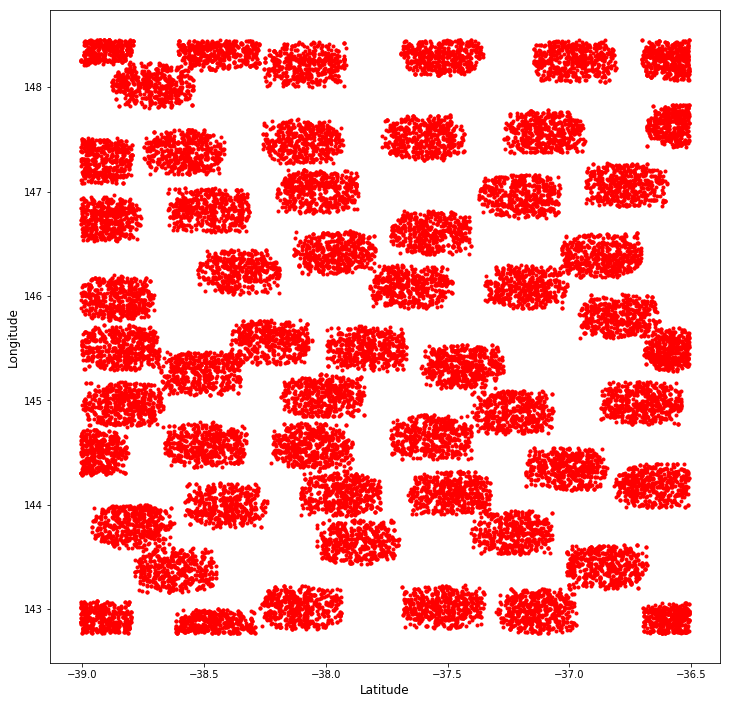

In [25]:
plt.figure(figsize=(12,12))
plt.ylabel('Longitude', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
for i in range(id_n):
    cluster=np.where(id_label==i)[0]
    plt.plot(X['Origin Latitude'][cluster].values,X['Origin Longitude'][cluster].values,'r.')
plt.show()

* After this We have applied kneighbor classifier and predict the value of total number of null and valuse which is not in right region.

In [26]:
X = df1_test1[["Origin Latitude", "Origin Longitude"]]
y = df1_test1["Origin Region"].reshape(-1, 1)
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier()
neigh.fit(X, y) 

df1["origin"] = neigh.predict(df1[["Origin Latitude", "Origin Longitude"]])

for each in df1.index:    
    if df1.loc[each]["origin"] != df1.loc[each]["Origin Region"]:
        df1.at[each,"Origin Region"]=df1.loc[each]["origin"]

C:\Users\mayank bhardwaj\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  
C:\Users\mayank bhardwaj\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """


In [27]:
df1['Origin Region'].isnull().sum()# checking all value of null imputed

0

## 9. Destination clustring
* Firstly we are not sure data in destination region is correct or not. So in order to check we have to do clustering of all destination on the basis of kmeans.
* In order to check that we have selected the data which is not null as destination region also contains null. 
https://www.kaggle.com/xxing9703/kmean-clustering-of-latitude-and-longitude

In [28]:
df1['Destination Region'].describe() 

count    35485.000000
mean        28.636241
std         16.116083
min          1.000000
25%         15.000000
50%         29.000000
75%         43.000000
max         56.000000
Name: Destination Region, dtype: float64

* We have to check how many cluster we have to make. In order to achive that i have check the description of data and take out maximum and minimum valve in order to put cluster count.

C:\Users\mayank bhardwaj\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\mayank bhardwaj\Anaconda3\lib\site-packages\pandas\core\series.py:696: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


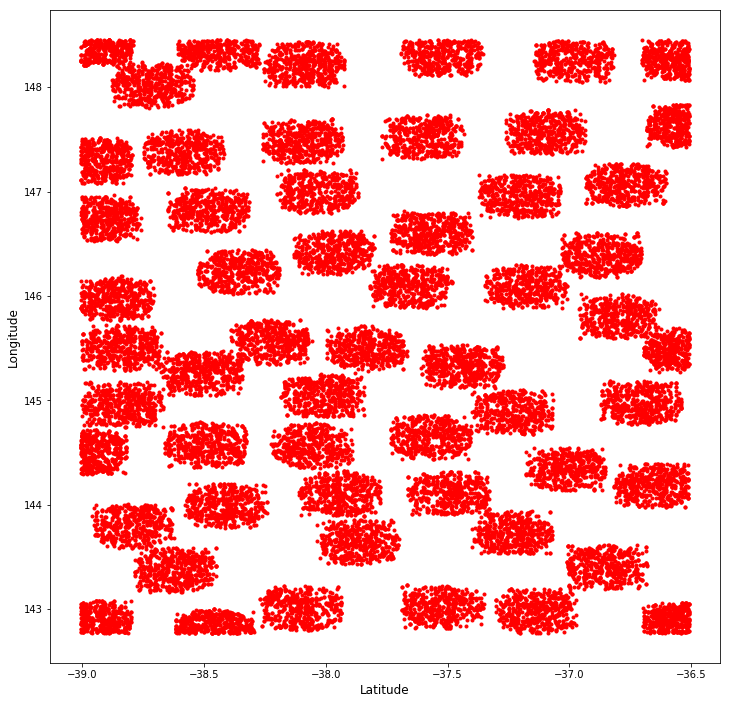

In [29]:

df1_test2=df1[df1['Destination Region'].isna() == False]
df1_test2.dropna(axis=0,how='any',subset=['Destination Latitude','Destination Longitude'],inplace=True)
X=df1_test2.loc[:,['Destination Latitude','Destination Longitude']]
zp=df1_test2['Destination Region']
kmeans = KMeans(n_clusters=id_n, random_state=0).fit(X)
id_label=kmeans.labels_
plt.figure(figsize=(12,12))
plt.ylabel('Longitude', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
for i in range(id_n):
    cluster=np.where(id_label==i)[0]
    plt.plot(X['Destination Latitude'][cluster].values,X['Destination Longitude'][cluster].values,'r.')
plt.show()

* After this We have applied kneighbor classifier and predict the value of total number of null and valuse which is not in right region.

In [30]:

X = df1_test2[["Destination Latitude", "Destination Longitude"]]
y = df1_test2["Destination Region"].reshape(-1, 1)
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier()
neigh.fit(X, y) 

df1["destination"] = neigh.predict(df1[["Destination Latitude", "Destination Longitude"]])

for each in df1.index:
    
    if df1.loc[each]["destination"] != df1.loc[each]["Destination Region"]:
        df1.at[each,"Destination Region"] = df1.loc[each]["destination"]

C:\Users\mayank bhardwaj\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\mayank bhardwaj\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


## 10. Post type correction
When we have checked the id column we have observe that maximum value of post type depends on the third character of id which is eithe 1 or 5. So we have updated the 0 for value 1 and updated 1 for value 5.

In [31]:
for each in df1.index:
    if pd.isnull(df1.iloc[each]['Id'])==False:
        if df1.iloc[each]['Id'][2] == '1': # checking the value is 1
            post_type = 0                  #updating value of 1 as post type 0 
            df1.at[each, 'Post Type']=post_type
        else :
            df1.at[each, 'Post Type']= 1          

In [32]:
df1.isnull().sum() # checking post type has been imputed or not

Id                       24
Drone Type               10
Post Type                 0
Package Weight            0
Origin Region             0
Destination Region        0
Origin Latitude           0
Origin Longitude          0
Destination Latitude      0
Destination Longitude     0
Journey Distance          0
Departure Date            0
Departure Time            0
Travel Time              40
Delivery Time             0
Delivery Fare            29
Interval                  0
origin                    0
destination               0
dtype: int64

## 11. Drone Type Error.

* As we already know that drone type is dependent on speed so in order to achieve that we must know the speed of individual type of drone speed, which remains constant for every drone type. So firstly we have to calculate the speed of drone in the air removing the take off and landing speed(beta). With the help of formula provided in the lecture we can calculate the beta and different drone type speed.

In [33]:
for each in df1.index:
    
    time = datetime.datetime.strptime(df1.iloc[each]["Delivery Time"], '%H:%M:%S')\
            - datetime.datetime.strptime(df1.iloc[each]["Departure Time"], '%H:%M:%S')
    if time.days < 0:
        time = datetime.timedelta(days=0,
                seconds=time.seconds, microseconds=time.microseconds)
    else:
        time = datetime.timedelta(days=time.days,
            seconds=time.seconds, microseconds=time.microseconds)
    time = time.seconds/60 + (time.days*24*60)

    df1.at[each, 'difference'] = round(time,2)
# Take the only time which has very less difference from the written and calculated from the 
# subtraction from delivery time and departure time.
for index in df1.index:
    if abs(df1.iloc[index]['difference']-round(df1.iloc[index]['Travel Time'],2)) < 0.02 : 
        df1.at[index,'value_1'] = 1
        
    else:
        df1.at[index,'value_1'] = 2

df2=df1[df1['value_1']==1]

In [34]:
#Drone Type1      
input1=df2[df2["Drone Type"]==1].sample(2) # taken 2 sample record to calculate speed and distance of drone.
input2=df2[df2["Drone Type"]==1].sample(2)
    
Time1=input1['Travel Time'].mean()
Time2=input2['Travel Time'].mean()
Distance1=input1['Journey Distance'].mean()
Distance2=input2['Journey Distance'].mean()
speed1=(Distance1-Distance2)*60/((Time1-10)-(Time2-10))
beta1=Distance1-speed1*(Time1-10)/60
    

for i in df1.index:
    df1.at[i,'new_time'] = 10/60+ ((df1.iloc[i]['Journey Distance']-beta1)/speed1)

df1["error_col1"] = 0
df1["error_col1"] = df1.apply(lambda x:abs(df1["new_time"] - df1["Travel Time"]/60)/df1["new_time"]) # percentage of error


In [35]:
# drone type 2    
input1=df2[df2["Drone Type"]==2].sample(2)
input2=df2[df2["Drone Type"]==2].sample(2)
    
Time1=input1['Travel Time'].mean()
Time2=input2['Travel Time'].mean()
Distance1=input1['Journey Distance'].mean()
Distance2=input2['Journey Distance'].mean()
speed2=(Distance1-Distance2)*60/((Time1-10)-(Time2-10))
beta2=Distance1-speed2*(Time1-10)/60
    

for i in df1.index:
    df1.at[i,'new_time'] = 10/60+ ((df1.iloc[i]['Journey Distance']-beta2)/speed2)

df1["error_col2"] = 0
df1["error_col2"] = df1.apply(lambda x:abs(df1["new_time"] - df1["Travel Time"]/60)/df1["new_time"]) # percentage of error


In [36]:
#Drone Type 3      
input1=df2[df2["Drone Type"]==3].sample(2)
input2=df2[df2["Drone Type"]==3].sample(2)
    
Time1=input1['Travel Time'].mean()
Time2=input2['Travel Time'].mean()
Distance1=input1['Journey Distance'].mean()
Distance2=input2['Journey Distance'].mean()
speed3=(Distance1-Distance2)*60/((Time1-10)-(Time2-10))
beta3=Distance1-speed3*(Time1-10)/60
    

for i in df1.index:
    df1.at[i,'new_time'] = 10/60+ ((df1.iloc[i]['Journey Distance']-beta3)/speed3)

df1["error_col3"] = 0
df1["error_col3"] = df1.apply(lambda x:abs(df1["new_time"] - df1["Travel Time"]/60)/df1["new_time"]) # percentage of error


In [37]:
for i in df1[df1["Drone Type"]==1].index:
    
    if df1.iloc[i]["error_col1"] > 0.01: #check for the threshold value of 0.01 for drone 1

        if (df1.iloc[i]["error_col2"] < 0.01)& (df1.iloc[i]["error_col3"] > 0.01): #check for the threshold value of 0.01
            df1.at[i,"Drone Type"]=2

        elif (df1.iloc[i]["error_col2"] > 0.01)& (df1.iloc[i]["error_col3"] < 0.01):
            df1.at[i, "Drone Type"]=3
            

            
for i in df1[df1["Drone Type"]==2].index:
    if df1.iloc[i]["error_col2"] > 0.01: #check for the threshold value of 0.01 for drone 2
        
        if (df1.iloc[i]["error_col1"] < 0.01)& (df1.iloc[i]["error_col3"] > 0.01):
            df1.at[i,"Drone Type"]=1
        elif (df1.iloc[i]["error_col1"] > 0.01)& (df1.iloc[i]["error_col3"] < 0.01):
            df1.at[i, "Drone Type"]=3  


for i in df1[df1["Drone Type"]==3].index:
    if df1.iloc[i]["error_col3"] > 0.01: #check for the threshold value of 0.01 for drone 3
        
        if (df1.iloc[i]["error_col1"] < 0.01)& (df1.iloc[i]["error_col2"] > 0.01):
            df1.at[i,"Drone Type"]=1
        elif (df1.iloc[i]["error_col1"] > 0.01)& (df1.iloc[i]["error_col2"] < 0.01):
            df1.at[i, "Drone Type"]=2

In [38]:
print('Beta and speed value for drone type 1,2,3 are:')
beta1,speed1,beta2,speed2,beta3,speed3

Beta and speed value for drone type 1,2,3 are:


(2.9959249235409686,
 70.00159202312624,
 3.581560516602508,
 74.97564575645839,
 3.586038221608675,
 76.99923301119802)

* Now we have the beta and speed of drone so we can impute the drone type in the basis of these values after calculating the error in the erro_col1,error_col2,error_col3. In addition to this we are also going to impute null value of drone type.

In [39]:
for i in df1[df1["Drone Type"].isna() == True].index:
    if df1.iloc[i]["error_col1"] < 0.01 and df1.iloc[i]["error_col2"] > 0.01 and df1.iloc[i]["error_col3"] > 0.01:
        df1.at[i, "Drone Type"]=1
    elif df1.iloc[i]["error_col1"] > 0.01 and df1.iloc[i]["error_col2"] < 0.01 and df1.iloc[i]["error_col3"] > 0.01:
        df1.at[i, "Drone Type"]=2
    elif df1.iloc[i]["error_col1"] > 0.01 and df1.iloc[i]["error_col2"] > 0.01 and df1.iloc[i]["error_col3"] < 0.01:
        df1.at[i, "Drone Type"]=3

In [40]:
df1[(df1["Drone Type"].isna() == True)]

,Id,Drone Type,Post Type,Package Weight,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,...,Delivery Fare,Interval,origin,destination,difference,value_1,new_time,error_col1,error_col2,error_col3


In [41]:
df = pd.read_csv('29325293.csv')
count=0
for i in df1.index:
    if df1.iloc[i]["Drone Type"] != df.iloc[i]["Drone Type"]:
        count+=1
print('total number of drone types updated are: ' ,count)

total number of drone types updated are:  62


## 12. Time Correction.
* Now we have journey distance,beta and speed so we can calculate the new time which is the corrected time for original travel time.

In [42]:
#drone type 1
for i in df1[df1["Drone Type"] == 1].index:
        df1.at[i,"new_time"] = round((10+ ((df1.iloc[i]['Journey Distance']-beta1)/speed1)*60), 2)
#drone type 2
for i in df1[df1["Drone Type"] == 2].index:
        df1.at[i,"new_time"] = round((10+ ((df1.iloc[i]['Journey Distance']-beta2)/speed2)*60), 2)
#drone type 3
for i in df1[df1["Drone Type"] == 3].index:
        df1.at[i,"new_time"] = round((10+ ((df1.iloc[i]['Journey Distance']-beta3)/speed3)*60), 2)

* Now we have to impute the correct value for the travel time on the basis of new time that we have calculated from the formula.Check the threshold value in which my most of the data fall.

In [43]:
# Time imputaion
count = 0
for i in df1.index:
    if (abs(round(df1.iloc[i]["Travel Time"],2)-df1.iloc[i]["new_time"]) > 0.5) or (pd.isnull((df1.iloc[i]["Travel Time"]))==True):
        count+=1
        df1.at[i,"Travel Time"] = df1.iloc[i]["new_time"]
        
print('Total number of imputed values including null are: ',count)

Total number of imputed values including null are:  40


## 13. Delivery Time correction
* After we have generated the speed and beta value then we have taken out the new time value and substitue with travel time. * After this we are able to correct the delivery fare on the basis of simple addition such as departure plus the travel time gives us the delivery time. 

In [44]:
count = 0
for each in df1.index:
    time = datetime.datetime.strptime(df1.iloc[each]["Delivery Time"], '%H:%M:%S')\
            - datetime.datetime.strptime(df1.iloc[each]["Departure Time"], '%H:%M:%S')
   
    time = round(time.seconds/60 + (time.days*24*60),2)
    time2 = df1.iloc[each]['Travel Time']
    if time - time2 > 0.5:  
        delta = datetime.datetime.strptime(df1.iloc[each]["Departure Time"], '%H:%M:%S') + datetime.timedelta(minutes=time2)
        delta = datetime.datetime.strftime(delta, '%H:%M:%S')
        df1.at[each, "Delivery Time"] = delta
        

## 14. Fare prediction on basis of linear regression.
* We are going to apply the linear regression model and try to predict the fare value but before that we have to remove the all outliers from the fare and then run the linear rgression model for the fare prediction. 
* Below figure shows that there are many outliers in the data so we have to remove them.

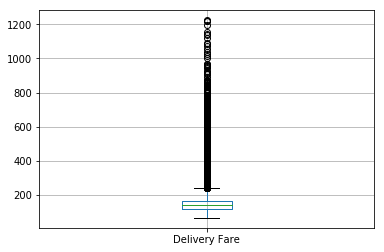

In [45]:
df1.boxplot("Delivery Fare") 

* To remove the outlier we are going to use the quantile method and calculate the q1,q2,q3,q4 from the delivery fare column of df1.
* caculate the value_q from subtracting the quantile3- quantile1 and multiply it with 1.5 and add with quantile 3 which gives us the upper bound value and after that create the dataframe of all the values lower than upper limit to use it further.

In [46]:
q1, q2, q3, q4 = df1["Delivery Fare"].quantile([0.25, 0.5, 0.75, 1])

value_q = q3-q1
upper = q3 + value_q*1.5

df1 = df1[df1["Delivery Fare"] < upper]

In [47]:
# applying the linear regression model for the delivery fare prediction by removing null values

from sklearn.model_selection import train_test_split
df1_test = df1[df1["Delivery Fare"].isna() == False][[ 'Drone Type', 'Post Type', 'Package Weight','Journey Distance',
       'Travel Time', 'Interval', 'Delivery Fare']] 
X=df1_test[[ 'Drone Type', 'Post Type', 'Package Weight','Journey Distance',
       'Travel Time', 'Interval']] 
y=df1_test[['Delivery Fare']] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 5) # 30% test data selected

* Below we are going to check the fit value by linear regression

In [48]:
from sklearn import linear_model
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)
model.score(X_train,y_train)

0.9864952763208252

In [49]:
y_pred=model.predict(X_test)

In [50]:
fare_pred = df1[[ 'Drone Type', 'Post Type', 'Package Weight','Journey Distance',
       'Travel Time', 'Interval']]
fare_pred['fare'] = model.predict(fare_pred)
fare_pred.head()

C:\Users\mayank bhardwaj\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Drone Type,Post Type,Package Weight,Journey Distance,Travel Time,Interval,fare
0,2.0,0.0,11.583,137.817,117.45,3.0,154.808511
1,3.0,0.0,5.310,213.231,173.36,3.0,192.802268
2,1.0,0.0,6.056,12.897,18.48,3.0,111.962923
3,2.0,1.0,23.097,303.750,250.20,2.0,179.345202
4,3.0,0.0,37.045,225.455,182.89,2.0,176.969883


* Here in below section we have replaces the fare value with the predicted corrected value

In [51]:
# Replace the Delivery fare value with predicted value.
count=0
for i in fare_pred.index:
    if df1.loc[i]['Delivery Fare'] != fare_pred.loc[i]['fare']:
        df1.at[i,'Delivery Fare'] = fare_pred.loc[i]['fare']
        

* Now we have to remove the duplicates and will drop the unnecessary columns that we have created.

In [52]:
df1.drop_duplicates(keep=False, inplace=True) # droping the duplicates

In [53]:
df1.head()

,Id,Drone Type,Post Type,Package Weight,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,...,Delivery Fare,Interval,origin,destination,difference,value_1,new_time,error_col1,error_col2,error_col3
0,ID1283879809,2.0,0.0,11.583,19.0,38.0,-37.851795,145.053264,-38.782273,146.094219,...,154.808511,3.0,19.0,38.0,117.45,1.0,117.42,0.064578,0.000228,0.024900
1,ID1194958354,3.0,0.0,5.310,50.0,48.0,-38.966836,143.021935,-37.500393,144.591013,...,192.802268,3.0,50.0,48.0,173.35,1.0,173.36,0.088526,0.024829,0.000008
2,ID1743409242,1.0,0.0,6.056,20.0,20.0,-37.955937,144.629139,-38.071065,144.645674,...,111.962923,3.0,20.0,20.0,18.47,1.0,18.49,0.000349,0.058736,0.070971
3,ID5579789852,2.0,1.0,23.097,8.0,54.0,-36.963368,143.425593,-37.318858,146.819675,...,179.345202,2.0,8.0,54.0,250.18,1.0,250.21,0.065663,0.000051,0.025846
4,ID1592324050,3.0,0.0,37.045,29.0,3.0,-36.549376,147.446981,-38.574712,147.450606,...,176.969883,2.0,29.0,3.0,182.88,1.0,182.89,0.088625,0.024880,0.000018


In [54]:
# droping the columns
df1 = df1.drop(["Interval"], axis = 1)
df1 = df1.drop(["origin"], axis = 1)
df1 = df1.drop(["destination"], axis = 1)
df1 = df1.drop(["difference"], axis = 1)
df1 = df1.drop(["value_1"], axis = 1)
df1 = df1.drop(["new_time"], axis = 1)
df1 = df1.drop(["error_col1"], axis = 1)
df1 = df1.drop(["error_col2"], axis = 1)
df1 = df1.drop(["error_col3"], axis = 1)

In [55]:
# Checking any null is still present
df1.isnull().sum()
# We can not impute null id as we can not generate random for id

Id                       24
Drone Type                0
Post Type                 0
Package Weight            0
Origin Region             0
Destination Region        0
Origin Latitude           0
Origin Longitude          0
Destination Latitude      0
Destination Longitude     0
Journey Distance          0
Departure Date            0
Departure Time            0
Travel Time               0
Delivery Time             0
Delivery Fare             0
dtype: int64

In [57]:
for columns in df1:
    print (type(df1[columns][1]))
df1.columns  

<class 'str'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'str'>
<class 'str'>
<class 'numpy.float64'>
<class 'str'>
<class 'numpy.float64'>


Index(['Id', 'Drone Type', 'Post Type', 'Package Weight', 'Origin Region',
       'Destination Region', 'Origin Latitude', 'Origin Longitude',
       'Destination Latitude', 'Destination Longitude', 'Journey Distance',
       'Departure Date', 'Departure Time', 'Travel Time', 'Delivery Time',
       'Delivery Fare'],
      dtype='object')

In [56]:
# Create the output file
df1.to_csv('29325293_solution.csv',index=False)

## References
* https://stackoverflow.com/questions/19412462/getting-distance-between-two-points-based-on-latitude-longitude
* https://stackoverflow.com/questions/3096953/how-to-calculate-the-time-interval-between-two-time-strings
* https://stackoverflow.com/questions/16353729/how-do-i-use-pandas-apply-function-to-multiple-columns
* https://www.kaggle.com/xxing9703/kmean-clustering-of-latitude-and-longitude
* https://stackoverflow.com/questions/19412462/getting-distance-between-two-points-based-on-latitude-longitude 
